In [16]:
# ciclo_amortiguado

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.interpolate import make_interp_spline
import numpy as np

allfigs = pd.read_csv(r'E:\TESIS_MAESTRIA\2 Figuras\Figuras en excel\allfigs.csv', encoding='latin1')
allfigs

,t,Tendencia de equilibrio,Oscilador Amortiguado,Oscilador,Oscilador_perturbación,Oferta,Y,Oferta_choque,Demanda,Periodos,...,tiempo2,Inversion,Depreciacion,n,Inversion2.1,C,E,L,A,Grafica diverge
0,1,5.206980,0.000000,0.980067,0.000000,5,1,6.5,14.0,1,...,4,-0.471328,0,4,-0.042358,1.32,0.32,-0.68,-1.68,-0.149962
1,2,5.748851,0.000000,0.921061,0.000000,5,2,6.5,12.5,2,...,5,-0.219007,0,5,0.329263,1.40,0.40,-0.60,-1.60,-0.745259
2,3,6.347113,0.000000,0.825336,0.000000,5,3,6.5,11.0,3,...,6,0.049184,0,6,0.707202,1.48,0.48,-0.52,-1.52,-3.513181
3,4,7.007633,0.000000,0.696707,0.000000,5,4,6.5,9.5,4,...,7,0.313811,0,7,1.064846,1.56,0.56,-0.44,-1.44,-2.699068
4,5,7.736892,0.000000,0.540302,0.000000,5,5,6.5,8.0,5,...,8,0.555699,0,8,1.377394,1.64,0.64,-0.36,-1.36,2.726425
5,6,8.542041,0.000000,0.362358,0.000000,5,6,6.5,6.5,6,...,9,0.757323,0,9,1.624072,1.72,0.72,-0.28,-1.28,11.206934
6,7,9.430980,0.000000,0.169967,0.000000,5,7,6.5,5.0,7,...,10,0.904072,0,10,1.789992,1.80,0.80,-0.20,-1.20,19.044390
7,8,10.412427,0.000000,-0.029200,0.000000,5,8,6.5,3.5,8,...,11,0.985314,0,11,1.867480,1.88,0.88,-0.12,-1.12,21.872861
8,9,11.496010,0.000000,-0.227202,0.000000,5,9,6.5,2.0,9,...,12,0.995162,0,12,1.856758,1.96,0.96,-0.04,-1.04,16.605064
9,10,12.692357,0.000000,-0.416147,0.000000,5,10,6.5,0.0,0,...,13,0.932902,0,13,1.765932,2.04,1.04,0.04,-0.96,3.066481


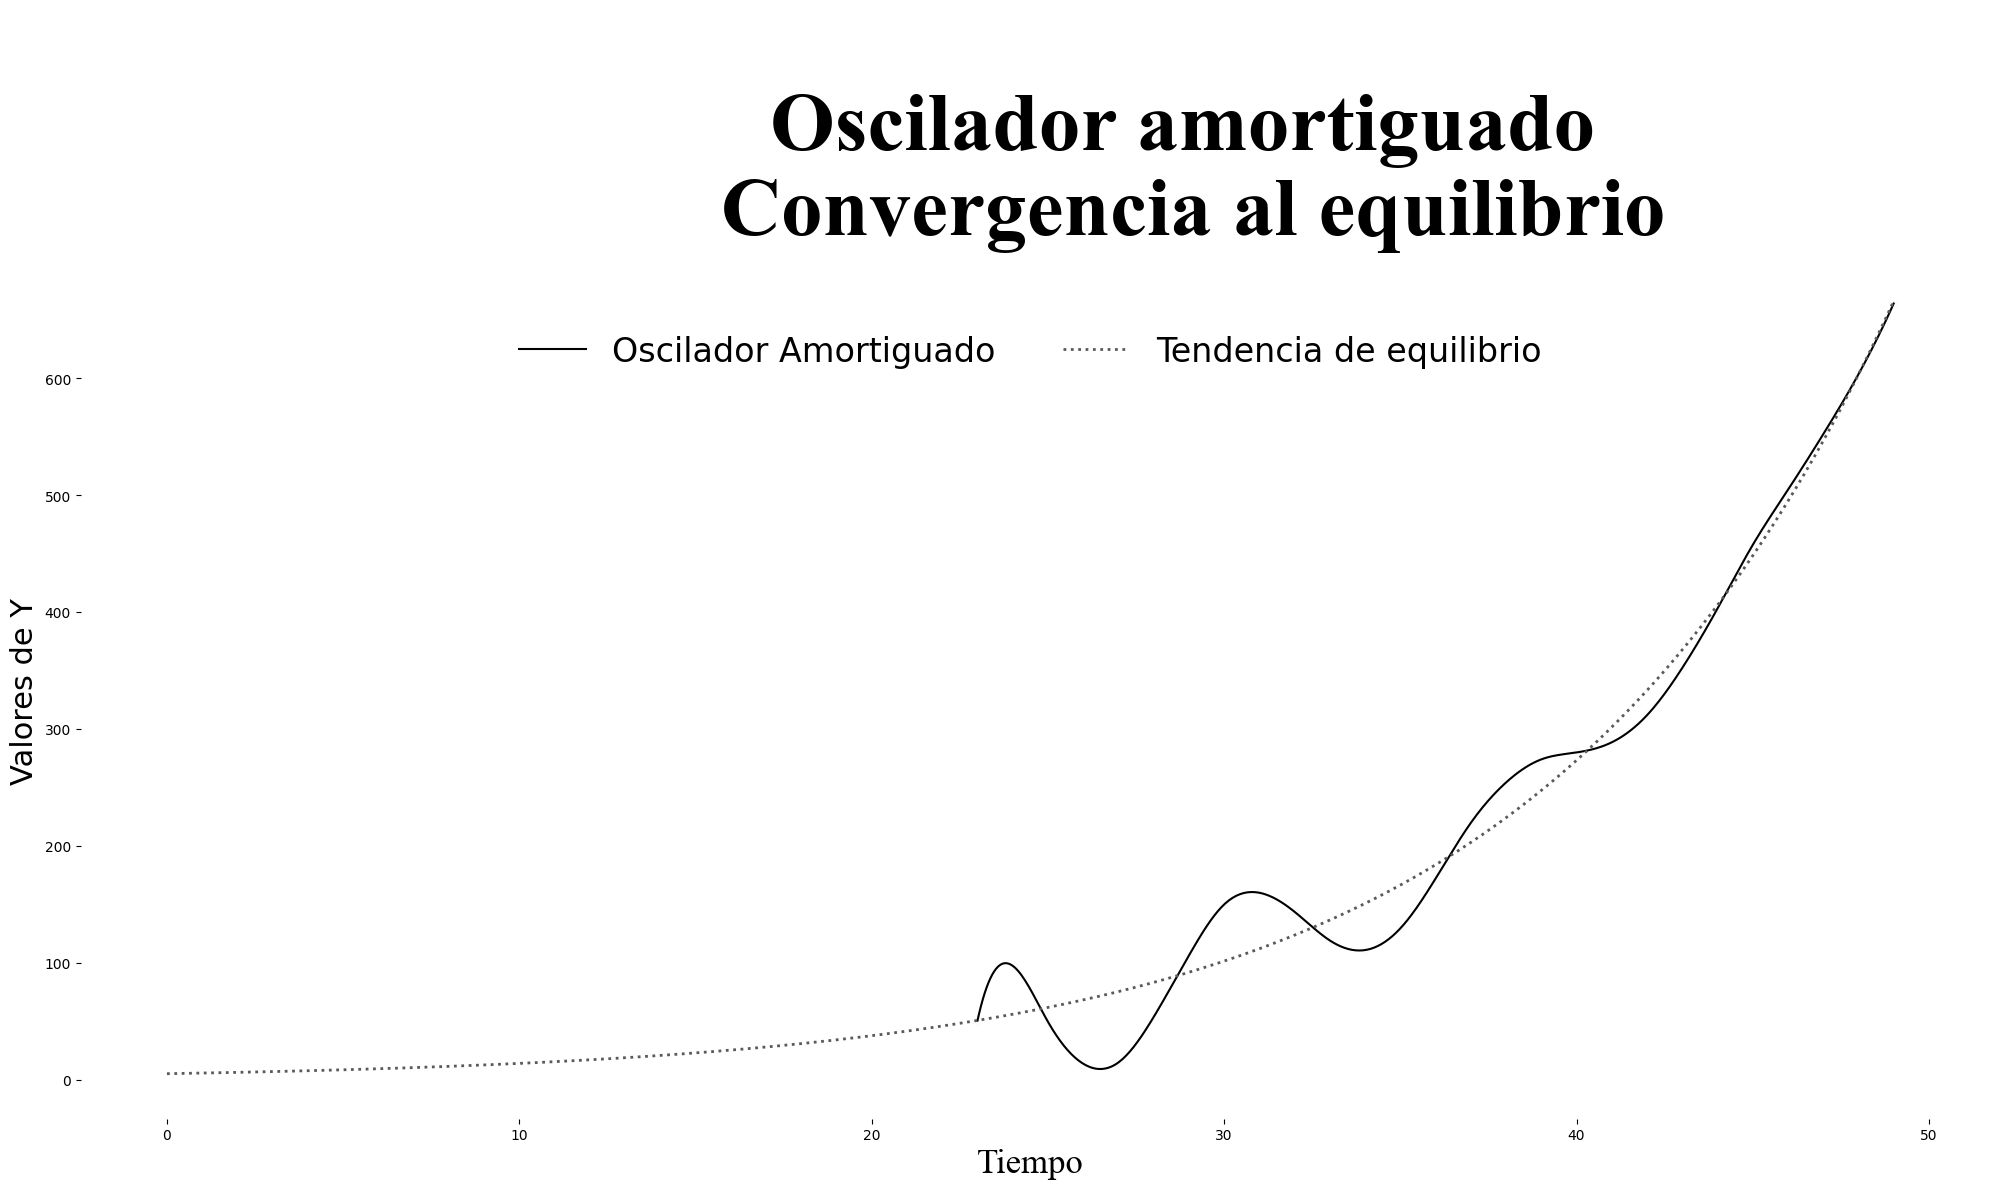

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

# Cargar datos desde CSV con una codificación diferente
allfigs = pd.read_csv(r'E:\TESIS_MAESTRIA\2 Figuras\Figuras en excel\allfigs.csv', encoding='latin1')

# Seleccionar las columnas relevantes
amortiguado = allfigs[['t', 'Tendencia de equilibrio', 'Oscilador Amortiguado']]

fig, ax1 = plt.subplots(figsize=(20, 12))

# Crear una secuencia numérica para el eje X
x_numeric = np.arange(len(amortiguado))

# Crear máscaras para valores cero y mayores a cero
mask_zero = amortiguado['Oscilador Amortiguado'] == 0
mask_nonzero = amortiguado['Oscilador Amortiguado'] != 0

# Suavizar la serie del "Oscilador Amortiguado" para los valores no nulos
def smooth_series(x, y):
    x_smooth = np.linspace(x.min(), x.max(), 500)
    spl = make_interp_spline(x, y, k=3)
    y_smooth = spl(x_smooth)
    return x_smooth, y_smooth

x_nonzero = x_numeric[mask_nonzero]
y_nonzero = amortiguado['Oscilador Amortiguado'][mask_nonzero].values
x_smooth, y_smooth = smooth_series(x_nonzero, y_nonzero)

# Suavizar la tendencia
x_smooth_trend, trend_smooth = smooth_series(x_numeric, amortiguado['Tendencia de equilibrio'])

# Graficar los datos suavizados
line1, = ax1.plot(x_smooth, y_smooth, label='Oscilador Amortiguado', linestyle='-', color='0', linewidth=1.5)
line2, = ax1.plot(x_smooth_trend, trend_smooth, label='Tendencia de equilibrio', linestyle=':', color='0.35', linewidth=2)

# Graficar los puntos originales con colores correspondientes
ax1.scatter(amortiguado.index[mask_zero], amortiguado['Oscilador Amortiguado'][mask_zero], color='white')
ax1.scatter(amortiguado.index[mask_nonzero], amortiguado['Oscilador Amortiguado'][mask_nonzero], color='0.99')

# Ajustar etiquetas de los ejes
ax1.set_ylabel('Valores de Y', size=22)
ax1.set_xlabel('Tiempo', fontfamily='Times New Roman', size=25)

# Quitar bordes de los ejes
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

# Agregar la leyenda y ajustar su posición y formato
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2, fontsize=24, frameon=False)

# Título general
plt.title('\nOscilador amortiguado\n Convergencia al equilibrio',
          size=60,  # Aumenta el tamaño de la fuente
          weight='bold',  # Puedes usar 'bold' para hacer el texto más grueso
          fontfamily='Times New Roman',  # Mantienes la fuente Times New Roman
          y=1,  # Ajusta la posición vertical como lo necesites
          x=0.58,
          pad=20
          )

# Ajustar layout
plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig(r'E:\TESIS_MAESTRIA\2 Figuras\Figuras from python\OsciladorAmortiguado.pgf')
# Mostrar el gráfico
plt.show()


year_trimestre
1993-1   -6.66
1993-2    0.98
1993-3   -3.11
1993-4    8.80
1994-1   -6.66
Name: Estacionalidad, dtype: float64


C:\Users\ARMANDO\AppData\Local\Temp\ipykernel_23112\3834670212.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(f'{txt:.2f}', (x_numeric[i], etiquetas_estacionalidad[i]),
C:\Users\ARMANDO\AppData\Local\Temp\ipykernel_23112\3834670212.py:46: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(f'{txt:.2f}', (x_numeric[i], etiquetas_estacionalidad[i]),
C:\Users\ARMANDO\AppData\Local\Temp\ipykernel_23112\3834670212.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(x_numeric[i], etiquetas_estacionalidad[i], 'o', marke

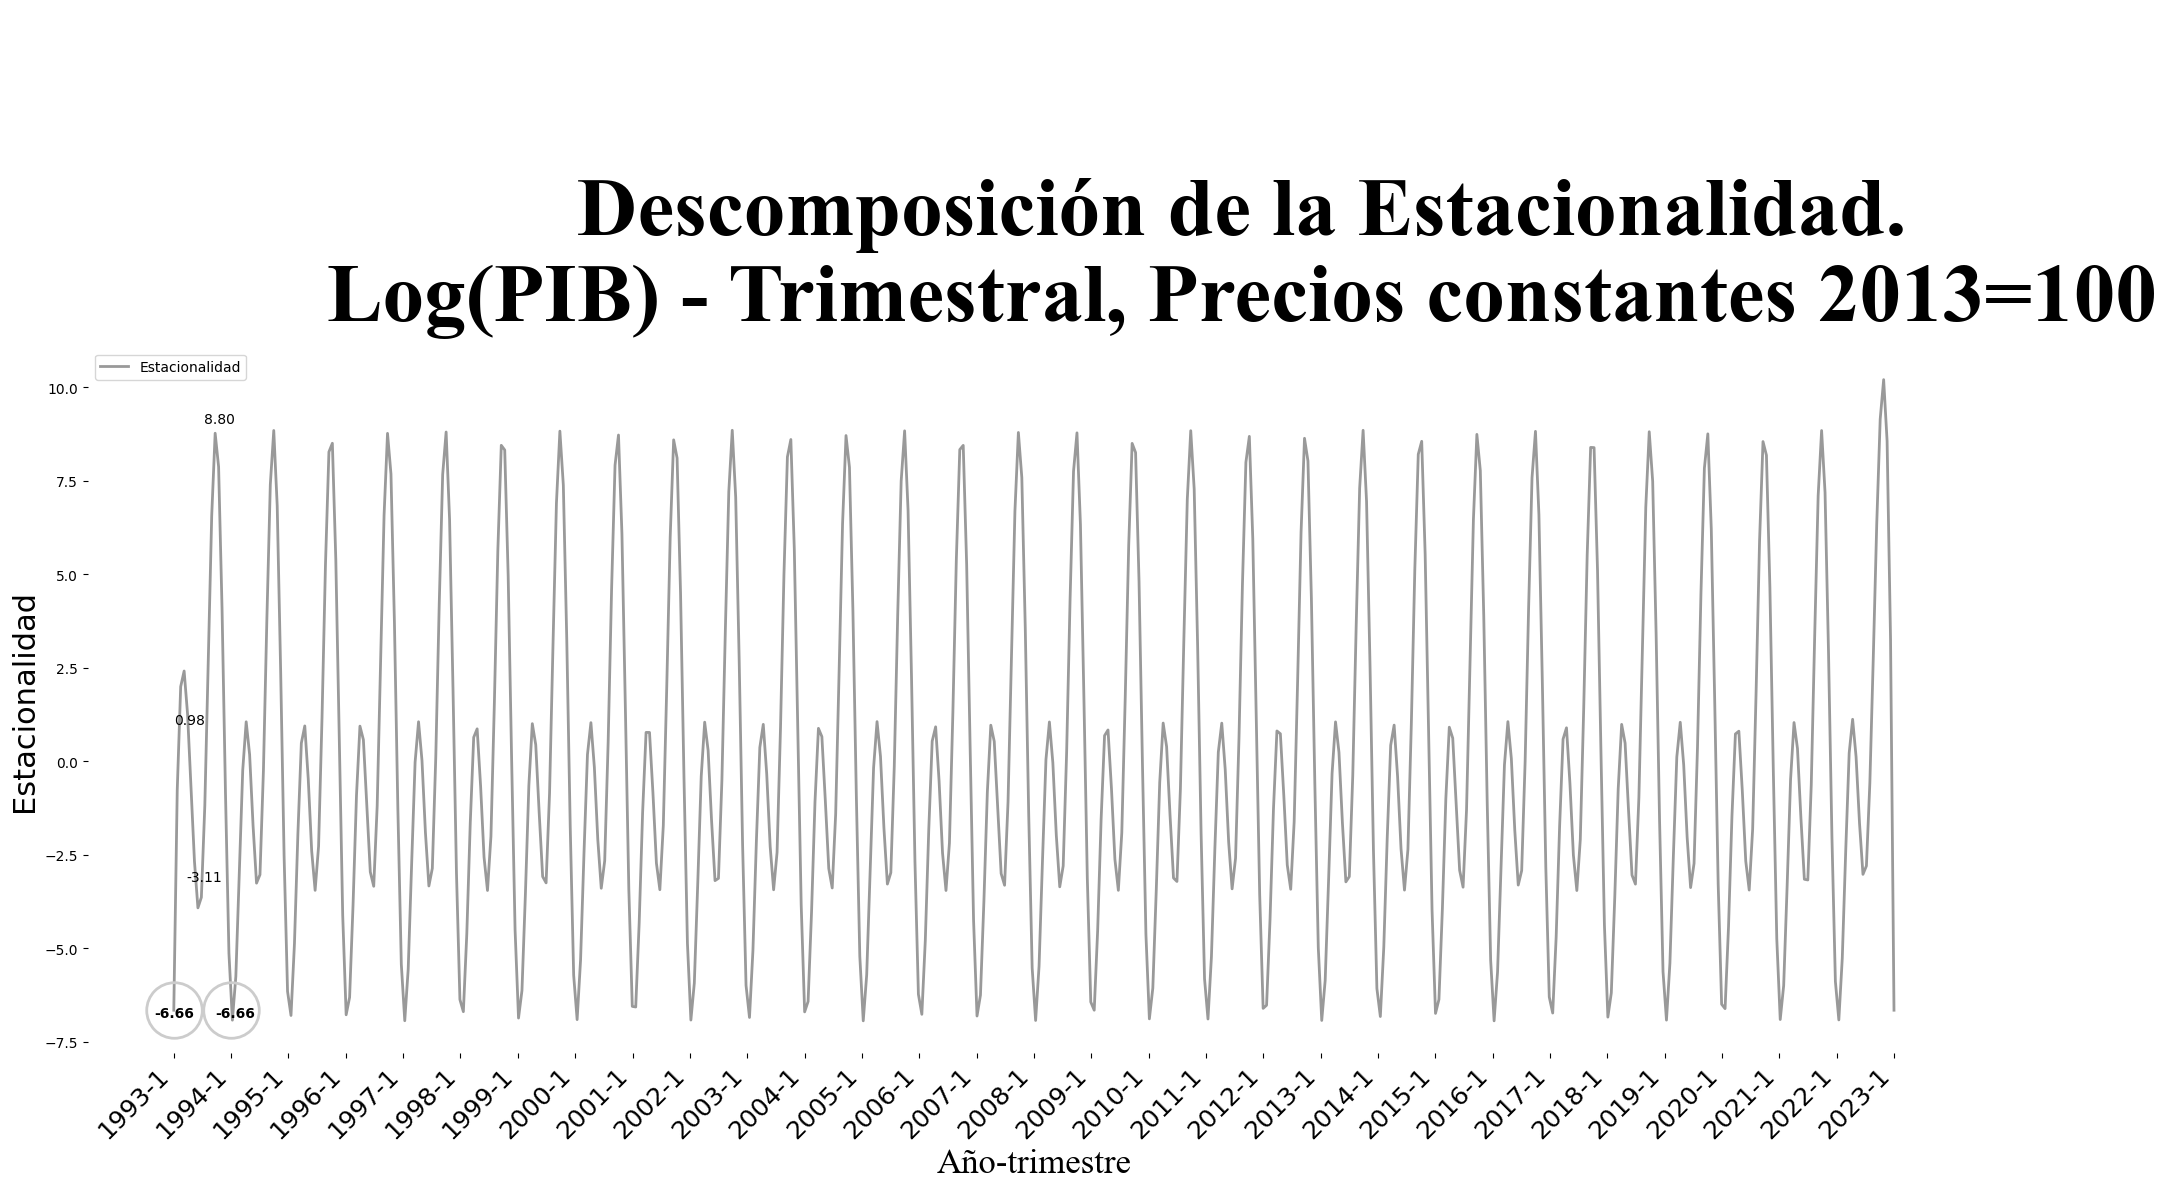

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.interpolate import make_interp_spline
import numpy as np

# Cargar datos desde CSV
LOGPIB = pd.read_csv(r'E:\TESIS_MAESTRIA\2 Figuras\Figuras en excel\LOGPIB.csv')

# Convertir 'year' y 'Trimestre' a datetime
LOGPIB['year_trimestre'] = LOGPIB['year'].astype(str) + '-' + LOGPIB['Trimestre'].astype(str)
LOGPIB.set_index('year_trimestre', inplace=True)

# Realizar la descomposición estacional
result = seasonal_decompose(LOGPIB['LOGPIB'], model='additive', period=4)
LOGPIB['Estacionalidad'] = round(1000 * result.seasonal, 2) # esimportante porque si no los ejes son demasiado pequeños

# Crear figura
fig, ax = plt.subplots(figsize=(20, 12))

# Generar datos suavizados
x = LOGPIB.index.values
x_numeric = np.arange(len(x))  # Crear una secuencia numérica para el eje X

def smooth_series(x, y):
    x_smooth = np.linspace(x_numeric.min(), x_numeric.max(), 500)
    spl = make_interp_spline(x_numeric, y, k=3)
    y_smooth = spl(x_smooth)
    return x_smooth, y_smooth

x_smooth, seasonal_smooth = smooth_series(x_numeric, LOGPIB['Estacionalidad'])

# Subplot: Estacionalidad
ax.plot(x_smooth, seasonal_smooth, label='Estacionalidad', linestyle='-', color='0.6', linewidth=2)
ax.set_ylabel('Estacionalidad', size=22)
ax.legend(loc='upper left')
ax.grid(False)

# obtenemos las etiquetas en forma de lista
etiquetas_estacionalidad = LOGPIB['Estacionalidad'].head(5) #es uno más que el numero de periodo Per+1
print(etiquetas_estacionalidad)

# Agregar las primeras 10 etiquetas
for i, txt in enumerate(etiquetas_estacionalidad):
    weight = 'bold' if i in [0, 4] else 'normal'  # Resaltar en negrita la primera y la cuarta etiqueta
    ax.annotate(f'{txt:.2f}', (x_numeric[i], etiquetas_estacionalidad[i]), 
                textcoords="offset pixels", ha='center', fontweight=weight)

    # Agregar círculo rojo alrededor de la primera y la cuarta etiqueta
    if i in [0, 4]:
        ax.plot(x_numeric[i], etiquetas_estacionalidad[i], 'o', markerfacecolor='none', markeredgecolor='0.8', markersize=40, markeredgewidth=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Ajustes de los ejes y apariencia general
plt.xlabel('Año-trimestre', fontfamily='Times New Roman', size=25)

# Título general
plt.title('\n\nDescomposición de la Estacionalidad.\nLog(PIB) - Trimestral, Precios constantes 2013=100',
          size=60,  # Aumenta el tamaño de la fuente
          weight='bold',  # Puedes usar 'bold' para hacer el texto más grueso
          fontfamily='Times New Roman',  # Mantienes la fuente Times New Roman
          y=1,  # Ajusta la posición vertical como lo necesites
          x=0.61,
          pad=20)

# Ajustar etiquetas del eje x
n_ticks = 31  # Número de ticks que quieres mostrar
x_ticks_indices = np.linspace(0, len(x_numeric) - 1, n_ticks, dtype=int)
x_ticks_labels = [x[i] for i in x_ticks_indices]

x_trim = [f"{year}-1" for year in range(1993, 2024)]
x_trim = x_trim[:len(x_ticks_indices)]

plt.xticks(x_ticks_indices, x_trim, rotation=45, ha='right', size=18)

# Aumentar espacio superior e inferior para la leyenda
plt.tight_layout(rect=[0, 0, 1, 1])


plt.savefig(r'E:\TESIS_MAESTRIA\2 Figuras\Figuras from python\LOGPIB_peropdper4.pgf')

plt.show()


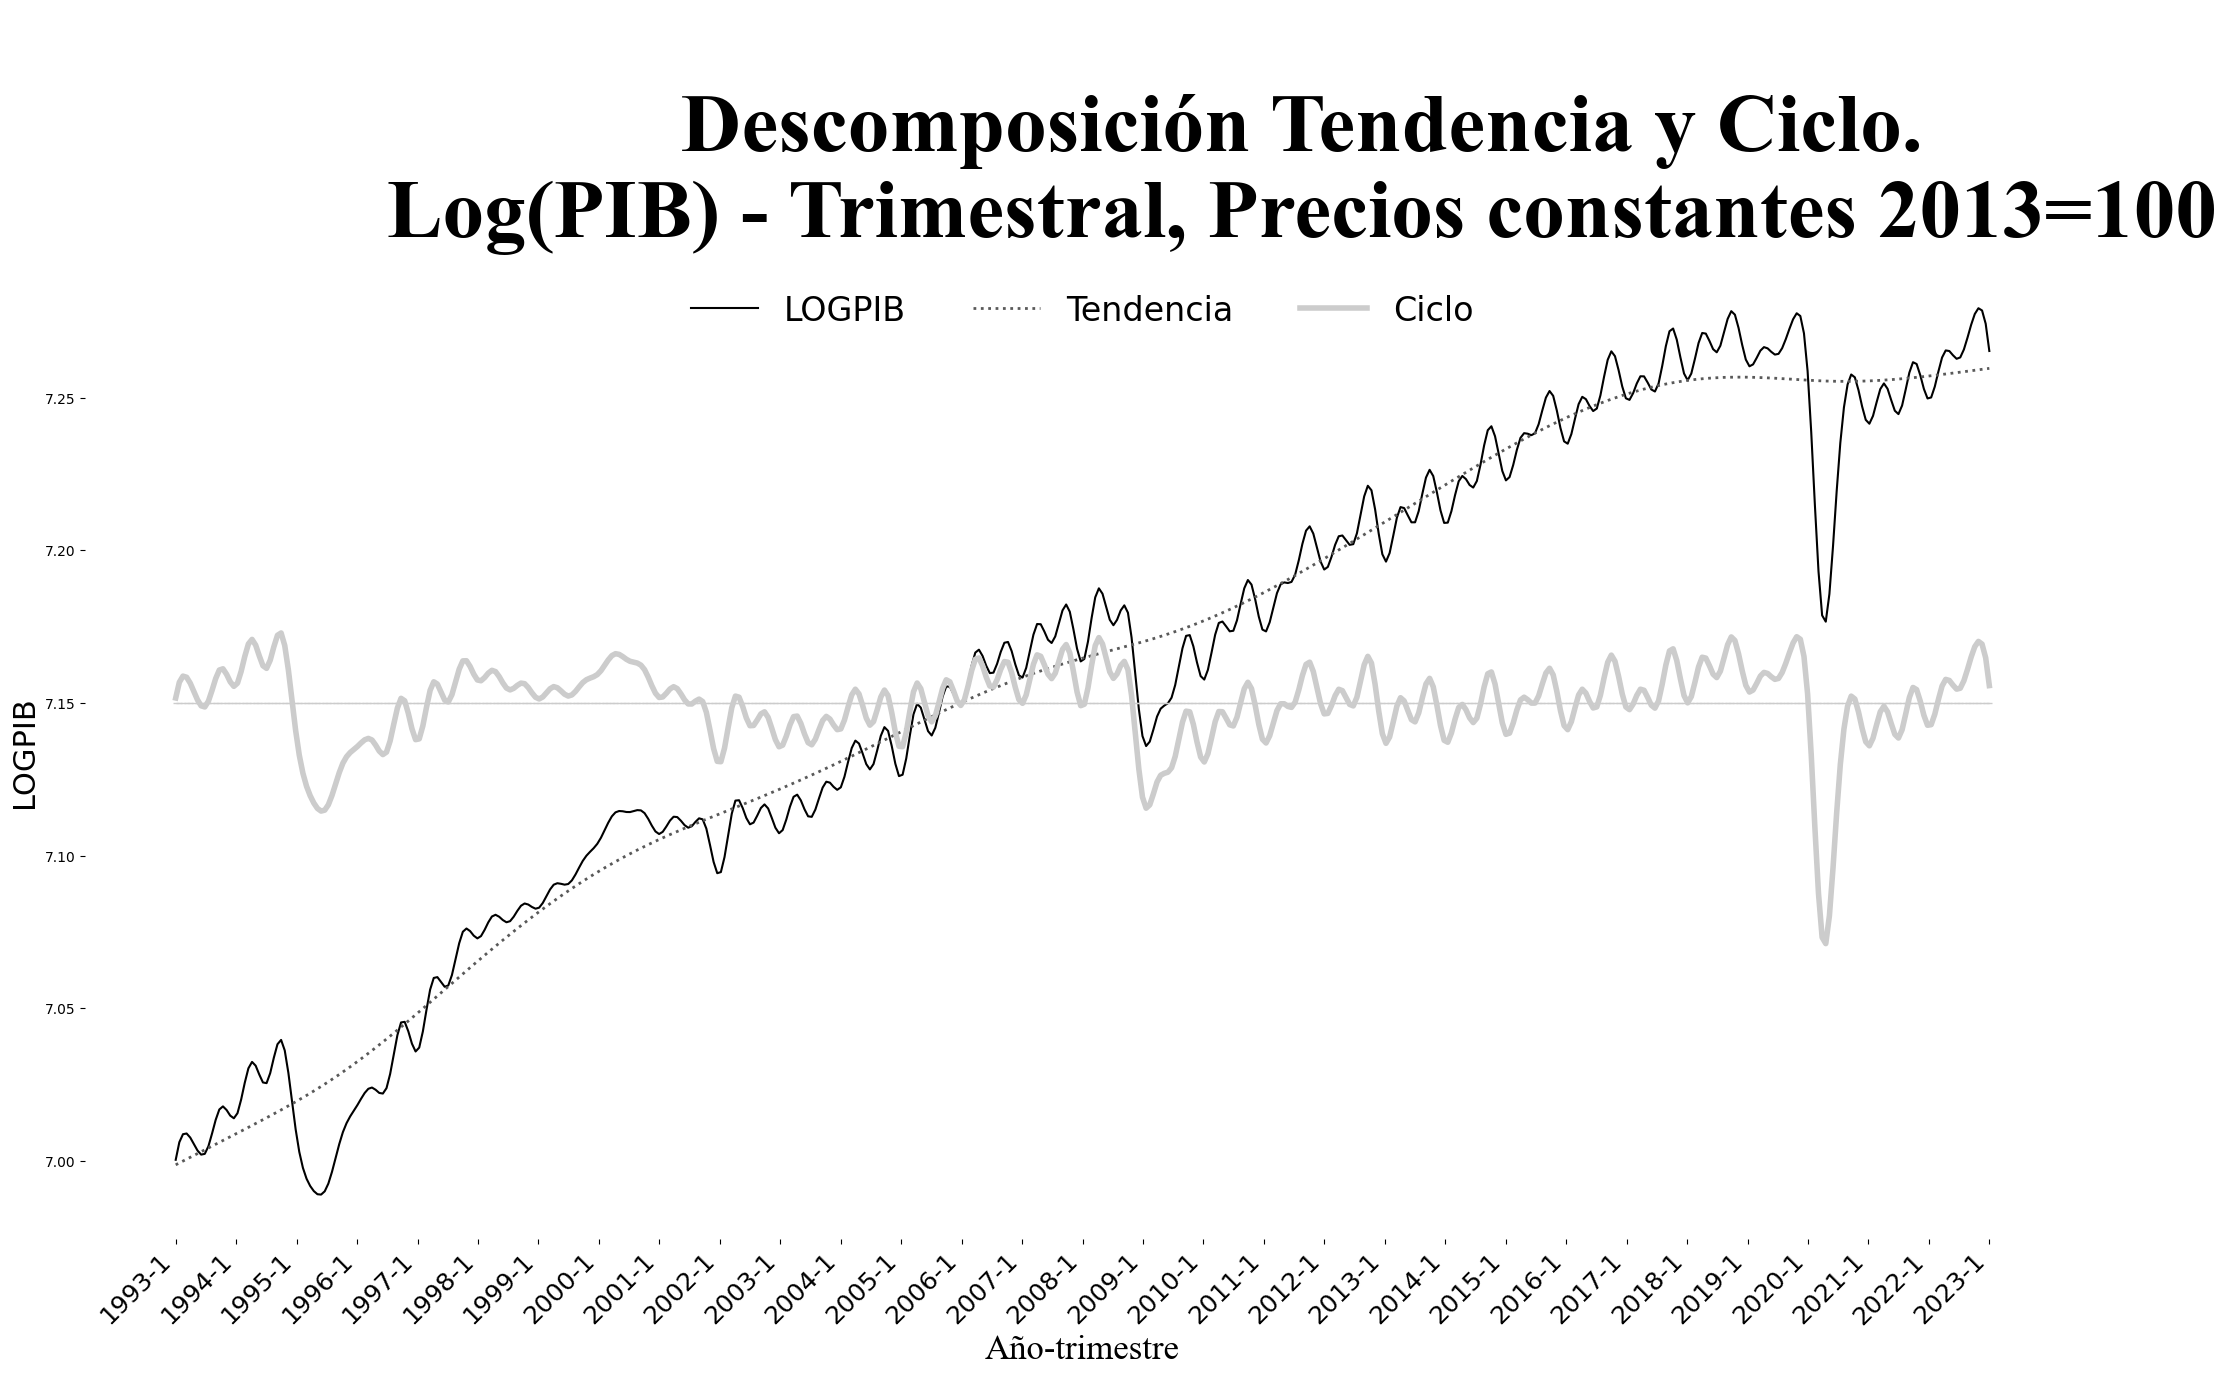

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
from scipy.interpolate import make_interp_spline
import numpy as np

# Cargar datos desde CSV
LOGPIB = pd.read_csv(r'E:\TESIS_MAESTRIA\2 Figuras\Figuras en excel\LOGPIB.csv')

# Convertir 'year' y 'Trimestre' a datetime
LOGPIB['year_trimestre'] = LOGPIB['year'].astype(str) + '-' + LOGPIB['Trimestre'].astype(str)
LOGPIB.set_index('year_trimestre', inplace=True)

# Aplicar filtro Hodrick-Prescott
cycle, trend = hpfilter(LOGPIB['LOGPIB'], lamb=1600)

# Agregar resultados al DataFrame
LOGPIB['Ciclo'] = cycle
LOGPIB['Tendencia'] = trend

# Crear figura con un subplot
fig, ax1 = plt.subplots(figsize=(21, 15))

# Generar datos suavizados
x = LOGPIB.index.values
x_numeric = np.arange(len(x))  # Crear una secuencia numérica para el eje X

def smooth_series(x, y):
    x_smooth = np.linspace(x_numeric.min(), x_numeric.max(), 500)
    spl = make_interp_spline(x_numeric, y, k=3)
    y_smooth = spl(x_smooth)
    return x_smooth, y_smooth

x_smooth, LOGPIB_smooth = smooth_series(x_numeric, LOGPIB['LOGPIB'])
_, trend_smooth = smooth_series(x_numeric, LOGPIB['Tendencia'])
_, cycle_smooth = smooth_series(x_numeric, LOGPIB['Ciclo'])

cycle_smooth = cycle_smooth + 7.15
constant_smooth = np.full_like(x_smooth, 7.15)  # Crear la serie constante

# Primer subplot: Serie temporal y tendencia
line1, = ax1.plot(x_smooth, LOGPIB_smooth, label='LOGPIB', linestyle='-', color='0', linewidth=1.5, marker='none', markersize=5, markerfacecolor='black', markeredgecolor='0.8')
line2, = ax1.plot(x_smooth, trend_smooth, label='Tendencia', linestyle=':', color='0.35', linewidth=2, marker='none', markersize=5, markerfacecolor='black', markeredgecolor='0.8')
line3, = ax1.plot(x_smooth, cycle_smooth, label='Ciclo', linestyle='-', color='0.8', linewidth=4, marker='', markersize=2, markerfacecolor='black', markeredgecolor='0')
line4, = ax1.plot(x_smooth, constant_smooth, label='0', linestyle='', color='0.8', linewidth=0.5, marker='_', markersize=5, markerfacecolor='black', markeredgecolor='0.8')

ax1.set_ylabel('LOGPIB', size=22)
ax1.grid(False)  # Desactivar la cuadrícula en el primer subplot

# Quitar bordes de los ejes
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

# Ajustes de los ejes y apariencia general
plt.xlabel('Año-trimestre', fontfamily='Times New Roman', size=25)  # Ajustar tamaño y fuente del xlabel

plt.title('\nDescomposición Tendencia y Ciclo.\nLog(PIB) - Trimestral, Precios constantes 2013=100',
          size=60,  # Aumenta el tamaño de la fuente
          weight='bold',  # Puedes usar 'bold' para hacer el texto más grueso
          fontfamily='Times New Roman',  # Mantienes la fuente Times New Roman
          y=1,  # Ajusta la posición vertical como lo necesites
          x=0.61,
          pad=20)

# Ajustar leyenda
lines = [line1, line2, line3]
labels = [line.get_label() for line in lines]
legend = ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fontsize=24, frameon=False)

# Ajustar etiquetas del eje x
n_ticks = 31  # Número de ticks que quieres mostrar
x_ticks_indices = np.linspace(0, len(x_numeric) - 1, n_ticks, dtype=int)
x_ticks_labels = [x[i] for i in x_ticks_indices]

x_trim = [f"{year}-1" for year in range(1993, 2024)]
x_trim = x_trim[:len(x_ticks_indices)]

plt.xticks(x_ticks_indices, x_trim, rotation=45, ha='right', size=18)  # Rotar las etiquetas para mayor legibilidad

# Aumentar espacio superior e inferior para la leyenda
plt.tight_layout(rect=[0, 0, 1, 1])
plt.subplots_adjust(top=0.85, bottom=0.2)  # Ajustar según sea necesario


plt.savefig(r'E:\TESIS_MAESTRIA\2 Figuras\Figuras from python\Hechos_Estilizados_LOGPIB_HP.pgf')

plt.show()


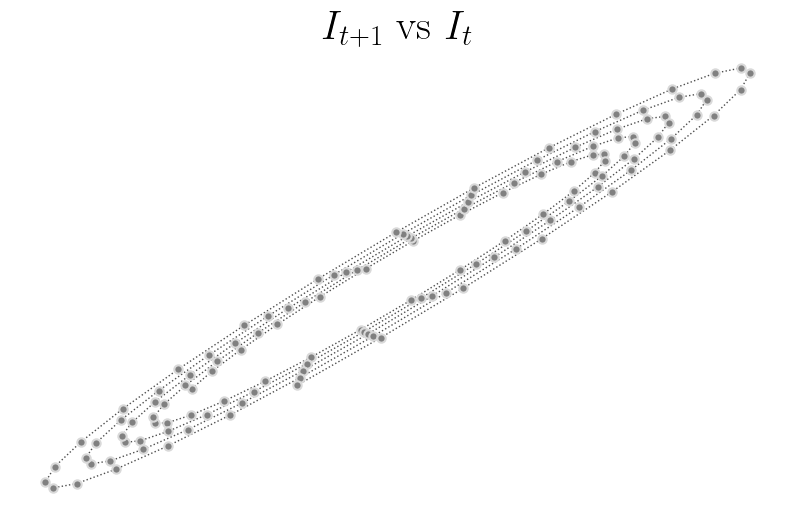

In [49]:
# vamos a realizar las gráficas de las ecuaciones de Kalecki:
#vamos a exportarlas en formato TIKZ coimpatible con LATEX

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",  # Cambia a pdflatex
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False,
})

a = 0.95
b = 1.009
Ft = 100
n = 135

I = np.zeros(n)
I[0] = 100
#loop para I[t]:
for t in range(1, n):
    if t == 1:
        Delta_I_t = I[t-1]
    else:
        Delta_I_t = I[t-1] - I[t-2]
    I[t] = a * I[t-1] + b * Delta_I_t + Ft
# dibujando
plt.figure(figsize=(10, 6))
plt.plot(I[:-1], I[1:], linestyle=':', color='0.3',linewidth='1',  marker='o',markeredgewidth='1.5', markersize=6,  markerfacecolor='.5', markeredgecolor='0.85')
plt.title('$I_{t+1}$  vs  $I_{t}$', fontfamily='serif', size=30)
plt.xlabel('I(t-1)')
plt.ylabel('I(t)')

#sin ejes
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

# Sin bordes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.grid(False)

plt.savefig(r'E:\TESIS MAESTRIA\2 Figuras\Figuras from python\grafica_kalecki_fases_1968.pgf')
# Sin cuadrícula


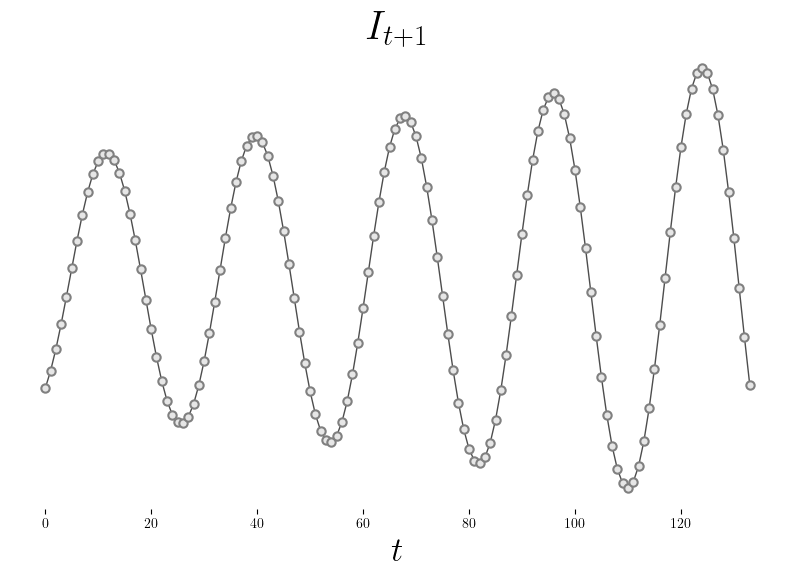

In [50]:
plt.figure(figsize=(10,6))
plt.plot(I[1:],linestyle='-', color='0.3',linewidth='1',  marker='o',markeredgewidth='1.5', markersize=6,  markerfacecolor='.9', markeredgecolor='0.5')
plt.xlabel('$t$', fontfamily="serif", size='25') 
plt.ylabel('$I_{t+1}$', fontfamily="serif", size='25')
plt.title('$I_{t+1}$', fontfamily='serif', size=30)

#sin ejes
# plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# # Sin cuadrícula
plt.grid(False)
plt.savefig(r'E:\TESIS MAESTRIA\2 Figuras\Figuras from python\grafica_kalecki_serieT_1968.pgf')


In [162]:
# swe pueden hacer animaciones con matplotlib
